In [ ]:
import numpy as np


class StateVectorSimulator:
    def __init__(self, num_qubits):
        """
        Initialize an n-qubit state vector in the |0...0> state.

        In our simulator, the all zero state is represented as [1, 0, ..., 0].
        """
        self.num_qubits = num_qubits
        # TODO
        self.state = [0 for _ in range(2 ** num_qubits)]
        self.state[0] = 1

    def apply_gate(self, gate, qubit_index):
        """
        Apply a gate (a 2^k x 2^k matrix) to a contiguous block of qubits
        starting at qubit_index.

        The full operator is constructed as:

            full_op = I^(⊗ qubit_index) ⊗ gate ⊗ I^(⊗(n - qubit_index - k))

        where k = log2(gate.shape[0]).

        Use np.kron to perform tensor products.
        """
        k = int(np.log2(gate.shape[0]))  # number of qubits the gate acts on
        self.state = np.matmul(np.kron(np.kron(np.eye(2 ** qubit_index), gate), np.eye(2 ** (self.num_qubits - qubit_index - k))), self.state)


    def h(self, qubit):
        """
        Apply the Hadamard gate on the specified qubit.
        """
        # TODO
        H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
        self.apply_gate(H, qubit)
        ...


    def x(self, qubit):
        """
        Apply the Pauli-X (NOT) gate on the specified qubit.
        """
        # TODO
        X = np.array([[0, 1], [1, 0]])
        self.apply_gate(X, qubit)
        ...


    def y(self, qubit):
        """
        Apply the Pauli-Y gate on the specified qubit.
        """
        # TODO
        Y = np.array([[0, -1j], [1j, 0]])
        self.apply_gate(Y, qubit)
        ...


    def z(self, qubit):
        """
        Apply the Pauli-Z gate on the specified qubit.
        """
        # TODO
        Z = np.array([[1, 0], [0, -1]])
        self.apply_gate(Z, qubit)
        ...


    def cx(self, control, target):
        """
        Apply a CNOT gate with the given control and target qubits.

        Note: This simple implementation assumes that the control and target
        qubits are adjacent (with control at index 'control' and target at
        'control+1'). For a more general case, additional qubit reordering (or
        a more involved full-indexing scheme) is needed.
        """
        # TODO
        # 2-qubit CNOT matrix:
        if target != control + 1:
            raise NotImplementedError("This implementation only supports adjacent qubits with target = control + 1.")

        CNOT = np.array([[1, 0, 0, 0],
                         [0, 1, 0, 0],
                         [0, 0, 0, 1],
                         [0, 0, 1, 0]])
        # Apply CNOT to qubits starting at 'control'
        self.apply_gate(CNOT, control)

In [ ]:
# Test on your favorite circuit! Make sure it produces the expected output
n = 2
sim = StateVectorSimulator(n)
sim.h(0)
print("Initial state:")
print(sim.state)

Initial state:
[0.70710678 0.         0.70710678 0.        ]


In [ ]:
# TODO
print("Memory cost of 20 qubits: ", np.array(StateVectorSimulator(20).state).nbytes / 1024 / 1024, "Mb")

Memory cost of 20 qubits:  8.0 Mb


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from time import time

def ghz(circuit):
    circuit.h(0)
    for i in range(circuit.num_qubits - 1):
        circuit.cx(i, i+1)
    return circuit

qubit_range = range(2, 15)
time_np, time_qiskit = [], []

## TODO
def ghz_custom(sim):
    sim.h(0)
    for i in range(sim.num_qubits - 1):
        sim.cx(i, i+1)
    return sim

for i in qubit_range:
    runtime = time()
    circuit = QuantumCircuit(i)
    circuit = ghz(circuit)
    simulator = AerSimulator()
    job = simulator.run(circuit, shots=1)
    time_qiskit.append(time() - runtime)
    runtime = time()
    for _ in range(1):
        sim = StateVectorSimulator(i)
        sim = ghz_custom(sim)
    time_np.append(time() - runtime)


Text(0, 0.5, 'Simulation Time')

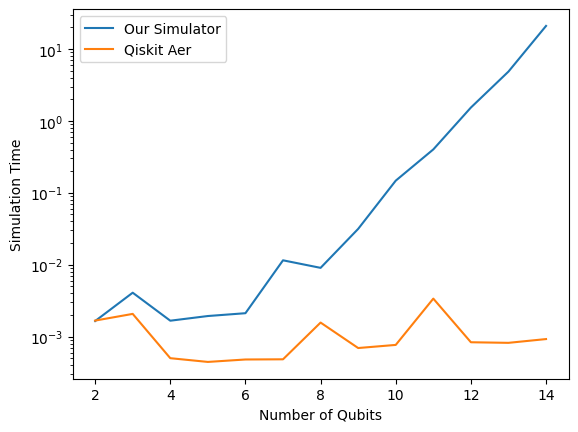

In [ ]:
import matplotlib.pyplot as plt

plt.semilogy(qubit_range, time_np, label="Our Simulator")
plt.semilogy(qubit_range, time_qiskit, label="Qiskit Aer")
plt.legend()
plt.xlabel("Number of Qubits")
plt.ylabel("Simulation Time")

## The difference in performance might come from parallel computing

In [ ]:
def sample_from_state(state, num_shots):
    samples = np.random.choice(len(state), size=num_shots, p=np.abs(state) ** 2)
    return np.bincount(samples)

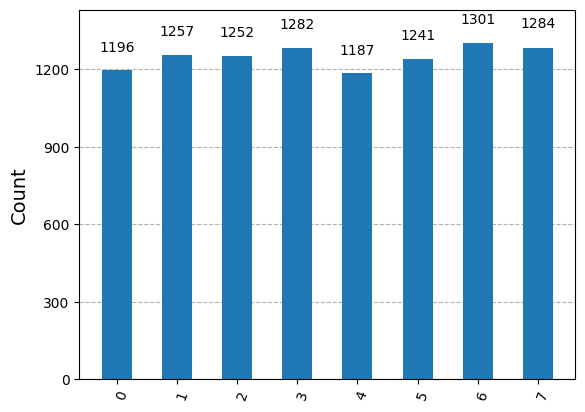

In [ ]:
# Try different shots and circuits to verify it works as expected!
n = 3
num_shots = 10000

simulator = StateVectorSimulator(n)
for i in range(n):
    simulator.h(i)
plot_histogram(dict(enumerate(sample_from_state(simulator.state, num_shots))))